In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy.physics.continuum_mechanics.beam import Beam
sym.init_printing()
%config InlineBackend.figure_formats = ['svg']

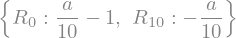

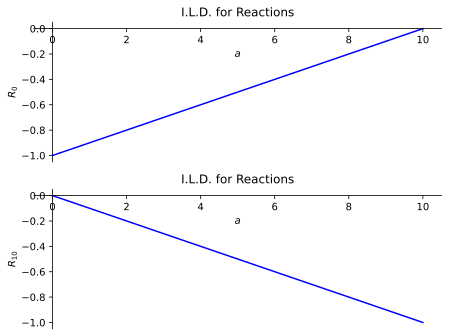

In [2]:
E = sym.Symbol('E')
I = sym.Symbol('I')
b = Beam(10, E, I)
R_0, R_10 = sym.symbols('R_0, R_10')
r_0 = b.apply_support(0, type='pin')
r_10 = b.apply_support(10, type='pin')
#b.solve_for_reaction_loads(R_0, R_10)
#b.reaction_loads
b.solve_for_ild_reactions(1, R_0, R_10)
display(b.ild_reactions)
b.plot_ild_reactions();

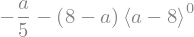

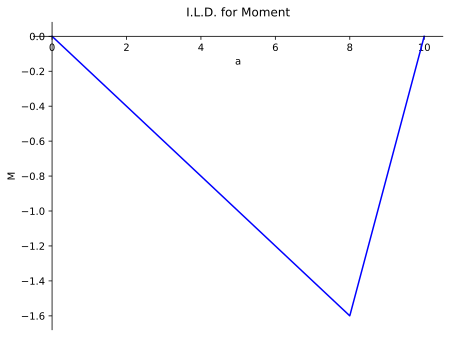

In [3]:
b.solve_for_ild_moment(8, 1, R_0, R_10)
display(b.ild_moment)
b.plot_ild_moment();

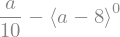

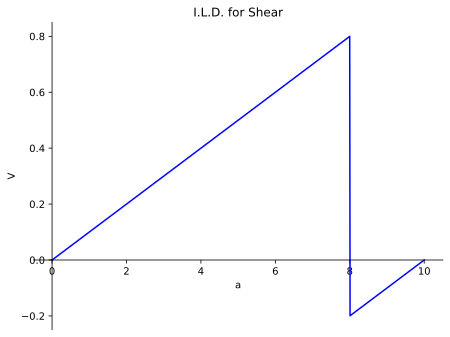

In [4]:
b.solve_for_ild_shear(8, 1, R_0, R_10)
display(b.ild_shear)
b.plot_ild_shear();